# Analysis
Observed trend 1:

Observed trend 2:

Observed trend 3:


In [22]:
# Importing Dependencies
import matplotlib.pyplot as plt
import requests
import openweathermapy.core as ow
import pandas as pd
import os
import json
import citipy
import random
import numpy as np
import seaborn as sb
import time

In [23]:
#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}
api_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__')))))
file_name = os.path.join(api_dir, "api_keys.json")
data = json.load(open(file_name))

wkey = data['open_weather_map_api_key']

# url = "api.openweathermap.org/data/2.5/weather?lat=" + lat + "&lon=" + lng + "appid=" + wkey


In [71]:
# Take in cities and coords database
cities_file = os.path.join("Resources", "cities1000.csv")
cities_data_df = pd.read_csv(cities_file)

# Create random sample of cities to have coords to use
sample_cities_df = cities_data_df.sample(n=500, random_state=20)
sample_cities_df.head()

,City,Latitude,Longitude,Country Code
79101,Grou,53.09456,5.83745,NL
118623,Augusta,42.97479,-75.50129,US
42604,Wilmcote,52.22081,-1.76528,GB
112715,Belpre,39.27396,-81.5729,US
26285,Abū al Maţāmīr,30.91018,30.17438,EG


In [75]:
# Setting up sentiments
url = 0
counter = 0
weather_dict = {"city" : [],
                "country_code" : [],
                "lat" :  [],
                "lng" : [],
                "temp" : [],
                "humidity" : [],
                "cloudiness" : [],
                "wind_speed" :  []}

# Starting loop to gather urls
for index, row in sample_cities_df.iterrows():
    
    # Creating URL for each lat and long set   
    url = "https://api.openweathermap.org/data/2.5/weather?lat=" + str(row['Latitude']) + "&lon=" + \
            str(row['Longitude']) + "&appid=" + wkey
        
    weather_json = requests.get(url).json()
    
    try:
        weather_dict['city'].append(weather_json['name'])
    except:
        weather_dict['city'].append("None")
    try:
        weather_dict['country_code'].append(weather_json['sys']['country'])
    except:
        weather_dict['country_code'].append("None")
        
    weather_dict['lat'].append(weather_json['coord']['lat'])
    weather_dict['lng'].append(weather_json['coord']['lon'])
    weather_dict['temp'].append(weather_json['main']['temp'] * (9/5) - 459.67)
    weather_dict['humidity'].append(weather_json['main']['humidity'])
    weather_dict['cloudiness'].append(weather_json['clouds']['all'])
    weather_dict['wind_speed'].append(weather_json['wind']['speed'])

    

weather_sample_df = pd.DataFrame(weather_dict)
weather_sample_df

,city,cloudiness,country_code,humidity,lat,lng,temp,wind_speed
0,Grou,0,NL,100,53.09,5.84,37.4360,2.10
1,New York,1,US,53,42.97,-75.50,27.5360,4.10
2,Stratford-upon-Avon,0,GB,86,52.22,-1.77,36.7520,2.60
3,Belpre,1,US,36,39.27,-81.57,42.0800,2.06
4,Abu al Matamir,40,EG,62,30.91,30.17,56.2820,5.10
5,Alfedena,48,IT,90,41.74,14.04,25.7648,0.91
6,Savarsin,12,RO,78,46.02,22.23,22.2998,2.06
7,Dammarie,12,FR,93,48.34,1.49,35.4740,2.60
8,Ash Shajarah,76,JO,100,32.64,35.94,40.3448,1.31
9,Lucany nad Nisou,92,CZ,96,50.74,15.22,33.4148,1.31


# Temperature (F) vs. Latitude

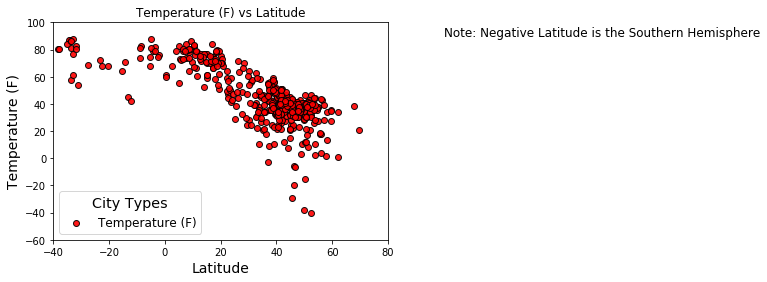

In [93]:
# Creating the scatter for Temp vs Lat
plt.scatter(weather_sample_df['lat'], weather_sample_df['temp'], marker="o", c='red', edgecolors="black", \
            alpha=.9, label="Temperature (F)")

# Formatting the plot
plt.ylim(-60, 100)
plt.xlim(-40, 80)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Temperature (F)", fontsize=14)
plt.title("Temperature (F) vs Latitude")
plt.text(100, 90, r'Note: Negative Latitude is the Southern Hemisphere', fontsize=12)
lgnd = plt.legend(loc="best", title='City Types', fontsize='large', frameon=True, facecolor='white')
plt.setp(lgnd.get_title(),fontsize='x-large')
plt.figure(figsize=(8, 8))

# Saving the scatter before printing
plt.savefig('Temp_vs_Latitude.png')

# Printng out the plot
plt.show()

